In [54]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [57]:
import matplotlib.pyplot as plt

# How to get and work with data?

## Satellite data

### Sentinel 2
Download from https://dataspace.copernicus.eu/browser/, manually, I guess?

### Landsat

## EOdal

Trying to get my head around EOdal. Follow tutorial `Loading Images` from https://github.com/EOA-team/eodal_notebooks/blob/96f1f76c30267105e5a57e0adbb88c18f9498191/notebooks/General/Loading_Images.ipynb

In [6]:
import numpy as np

In [8]:
from eodal.core.raster import RasterCollection
from eodal.core.band import Band
from eodal.core.band import GeoInfo

In [10]:
import eodal
print(f'EOdal version: {eodal.__version__}')

EOdal version: 0.2.4


In [19]:
# Generate an empty RasterCollection

# Create a GeoInfo object to georeference the satellite data. For this you need an epsg code, 
# the x and y coordinates of the upper left corner (nw),
# and the size of the raster cell. This has to be in the same units as the spatial reference system.

geo_info = GeoInfo(epsg = 32633, ulx = 300000, uly = 5100000, pixres_x = 10, pixres_y = -10)

ERROR 1: PROJ: internal_proj_create_from_database: /Users/barbara/opt/anaconda3/envs/310pip/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


ValueError: The EPSG code is unknown. PROJ: internal_proj_create_from_database: /Users/barbara/opt/anaconda3/envs/310pip/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.

The first time I run the above, I got 

```
ERROR 1: PROJ: internal_proj_create_from_database: /Users/barbara/opt/anaconda3/envs/310pip/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
---------------------------------------------------------------------------
CPLE_AppDefinedError                      Traceback (most recent call last)
File rasterio/crs.pyx:586, in rasterio.crs.CRS.from_epsg()

File rasterio/_err.pyx:195, in rasterio._err.exc_wrap_int()

CPLE_AppDefinedError: PROJ: internal_proj_create_from_database: /Users/barbara/opt/anaconda3/envs/310pip/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.

During handling of the above exception, another exception occurred:

CRSError                                  Traceback (most recent call last)
File ~/opt/anaconda3/envs/310pip/lib/python3.10/site-packages/eodal/core/band.py:212, in GeoInfo.__init__(self, epsg, ulx, uly, pixres_x, pixres_y)
    211 try:
--> 212     CRS.from_epsg(epsg)
    213 except Exception as e:

File rasterio/crs.pyx:590, in rasterio.crs.CRS.from_epsg()

CRSError: The EPSG code is unknown. PROJ: internal_proj_create_from_database: /Users/barbara/opt/anaconda3/envs/310pip/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.

During handling of the above exception, another exception occurred:

ValueError                                Traceback (most recent call last)
Cell In[17], line 7
      1 # Generate an empty RasterCollection
      2 
      3 # Create a GeoInfo object to georeference the satellite data. For this you need an epsg code, 
      4 # the x and y coordinates of the upper left corner (nw),
      5 # and the size of the raster cell. This has to be in the same units as the spatial reference system.
----> 7 geo_info = GeoInfo(epsg = 32633, ulx = 300000, uly = 5100000, pixres_x = 10, pixres_y = -10)

File ~/opt/anaconda3/envs/310pip/lib/python3.10/site-packages/eodal/core/band.py:214, in GeoInfo.__init__(self, epsg, ulx, uly, pixres_x, pixres_y)
    212         CRS.from_epsg(epsg)
    213     except Exception as e:
--> 214         raise ValueError(e)
    216 object.__setattr__(self, "epsg", epsg)
    217 object.__setattr__(self, "ulx", ulx)

ValueError: The EPSG code is unknown. PROJ: internal_proj_create_from_database: /Users/barbara/opt/anaconda3/envs/310pip/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
```

Found https://github.com/rasterio/rasterio/issues/1850, second to last comment. Following the description do:

```
$ echo $PROJ_LIB
/Users/barbara/opt/anaconda3/envs/310pip/share/proj

rasterio.__file__
/Users/barbara/opt/anaconda3/envs/310pip/lib/python3.10/site-packages/rasterio/__init__.py

$ export PROJ_LIB=/Users/barbara/opt/anaconda3/envs/310pip/lib/python3.10/site-packages/rasterio/proj_data/proj.db
```

--> still get the same error. I don't think I directly installed rasterio in this environment. I guess it came from when I installed GDAL via `$ conda install -c conda-forge gdal`. Let's try making a new conda environment and install rasterio directly and hope for the best.

```
$ conda create -n 310gis python=3.10
```

Install GDAL and other stuff

```
$ conda install -c conda-forge gdal
$ conda install -c conda-forge jupyterlab
$ conda install -c conda-forge notebook
$ conda install eodal  --> fails

# Trying to install rasterio (following https://rasterio.readthedocs.io/en/stable/installation.html)
$ python -m pip install --user -U pip 
$ GDAL_CONFIG=/Users/barbara/opt/anaconda3/envs/310gis/bin/gdal-config python -m pip install --user --no-binary rasterio rasterio
```

The rasterio install finished with 

```
Successfully built rasterio
Installing collected packages: pyparsing, click, affine, snuggs, cligj, click-plugins, rasterio
  WARNING: The script rio is installed in '/Users/barbara/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Successfully installed affine-2.4.0 click-8.1.7 click-plugins-1.1.1 cligj-0.7.2 pyparsing-3.1.1 rasterio-1.3.9 snuggs-1.4.7
```

Trying to import rasterio in python fails (`$ /Users/barbara/.local/bin/rio --help` works). There's no `rasterio` under `$ conda list`. Let's be dumb:

```
$ conda install -c conda-forge rasterio
```

Hmm, maybe that worked. Fingers crossed. And finally:

```
$ pip install eodal
```

#### Testing the installs:

In [5]:
# test the gdal installation
from osgeo import gdal

gdal.VersionInfo()

'3080300'

In [9]:
# test the rasterio installation
from rasterio.crs import CRS

CRS.from_epsg(32633)

CRS.from_epsg(32633)

In [24]:
# eodal again
import eodal

from eodal.core.raster import RasterCollection
from eodal.core.band import Band
from eodal.core.band import GeoInfo

import os
from pathlib import Path

In [14]:
print(f'EOdal version: {eodal.__version__}')

EOdal version: 0.2.4


In [12]:
import numpy as np

### Moving on with the tutorial

Follow tutorial `Loading Images` from https://github.com/EOA-team/eodal_notebooks/blob/96f1f76c30267105e5a57e0adbb88c18f9498191/notebooks/General/Loading_Images.ipynb

In [15]:
geo_info = GeoInfo(epsg = 32633, ulx = 300000, uly = 5100000, pixres_x = 10, pixres_y = -10)
# yessss!

In [16]:
geo_info

{'epsg': 32633, 'ulx': 300000, 'uly': 5100000, 'pixres_x': 10, 'pixres_y': -10}

In [20]:
# Make a RasterCollection

# define a band name for the band data to add
band_name = 'random'
# optionally, you can also asign a `band_alias` (e.g., color name)
band_alias = 'blue'

# let's define some random numbers in a 2-d array
values = np.random.random(size=(100,120))

# get the RasterCollection object
raster = RasterCollection(
         band_constructor=Band,
         band_name=band_name,
         values=values,
         band_alias=band_alias,
         geo_info=geo_info
)

# dir(raster)

raster



EOdal RasterCollection
----------------------
# Bands:    1
Band names:    random
Band aliases:    blue

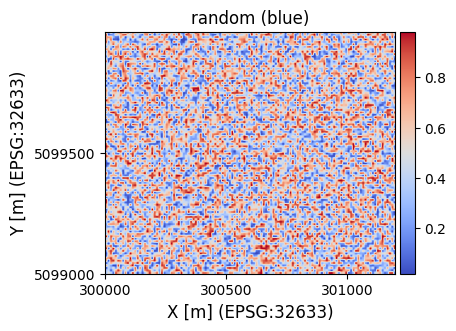

In [21]:
# Plot the band

f = raster.plot_band('random', colormap='coolwarm')


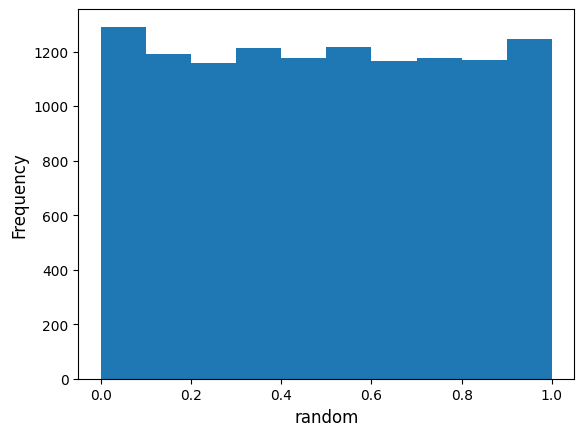

In [23]:
# Check distribution of values in the band:
h = raster['blue'].hist()


#### Load image data from disk

In [28]:
eodal.__file__

'/Users/barbara/opt/anaconda3/envs/310gis/lib/python3.10/site-packages/eodal/__init__.py'

In [32]:
# define path to image
s2_fpath = Path('/Users/barbara/dark-matter/eodal_notebooks/data/img/20190530_T32TMT_MSIL2A_S2A_pixel_division_10m.tiff')
s2_fpath.exists()

True

In [35]:
s2_ds = RasterCollection.from_multi_band_raster(fpath_raster=s2_fpath)
s2_ds

TypeError: 'NoneType' object is not subscriptable

In [59]:
band_props = RasterCollection._bands_from_selection(
            fpath_raster=s2_fpath,
            # band_idxs=band_idxs,
            # band_names_src=band_names_src,
            # band_names_dst=band_names_dst,
        )

In [60]:
band_props

{'band_idxs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'band_names_src': ['B02',
  'B03',
  'B04',
  'B05',
  'B06',
  'B07',
  'B08',
  'B8A',
  'B11',
  'B12'],
 'band_names_dst': ['B02',
  'B03',
  'B04',
  'B05',
  'B06',
  'B07',
  'B08',
  'B8A',
  'B11',
  'B12'],
 'band_count': 10}

In [64]:
band_aliases = ["" for _ in range(band_props["band_count"])]

In [65]:
band_aliases

['', '', '', '', '', '', '', '', '', '']

In [61]:
coll = RasterCollection()

In [69]:
s2_fpath

PosixPath('/Users/barbara/dark-matter/eodal_notebooks/data/img/20190530_T32TMT_MSIL2A_S2A_pixel_division_10m.tiff')

In [71]:
band_props["band_idxs"][band_idx], band_props["band_names_dst"][band_idx]

(1, 'B02')

In [73]:
band_idx = 0

coll.add_band(
    Band.from_rasterio,
    fpath_raster='/Users/barbara/dark-matter/eodal_notebooks/data/img/20190530_T32TMT_MSIL2A_S2A_pixel_division_10m.tiff', #s2_fpath,
    band_idx=band_props["band_idxs"][band_idx],
    band_name_dst=band_props["band_names_dst"][band_idx],
    band_alias="B02") #band_aliases[band_idx])

ValueError: Cannot initialize new Band instance: Nodata must not be None. Please pass `nodata` argument

In [74]:
Band.from_rasterio(
    fpath_raster='/Users/barbara/dark-matter/eodal_notebooks/data/img/20190530_T32TMT_MSIL2A_S2A_pixel_division_10m.tiff', #s2_fpath,
    band_idx=band_props["band_idxs"][band_idx],
    band_name_dst=band_props["band_names_dst"][band_idx],
    band_alias="B02",
)
    

TypeError: Nodata must not be None. Please pass `nodata` argument

In [36]:
s2_ds = RasterCollection.from_multi_band_raster(fpath_raster=s2_fpath,
                                                band_names_src=["B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B11", "B12"])



Exception: Could not add band B02 from /Users/barbara/dark-matter/eodal_notebooks/data/img/20190530_T32TMT_MSIL2A_S2A_pixel_division_10m.tiff to handler: Cannot initialize new Band instance: Nodata must not be None. Please pass `nodata` argument

In [37]:
# Try to open the file in rasterio
src = rasterio.open(s2_fpath)

In [48]:
src.descriptions, src.crs

(('B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12'),
 CRS.from_epsg(32632))

In [78]:
src.nodata

NoneType

In [49]:
array = src.read(1)

In [50]:
array

array([[ 677,  511,  425, ...,  479,  433,  458],
       [ 874,  698,  656, ...,  507,  514,  520],
       [1052,  823,  688, ...,  606,  692,  736],
       ...,
       [ 468,  396,  525, ...,  836, 1050, 1372],
       [ 922,  631,  455, ..., 1064, 1070, 1390],
       [ 939, 1010,  832, ...,  888,  888,  863]], dtype=uint16)

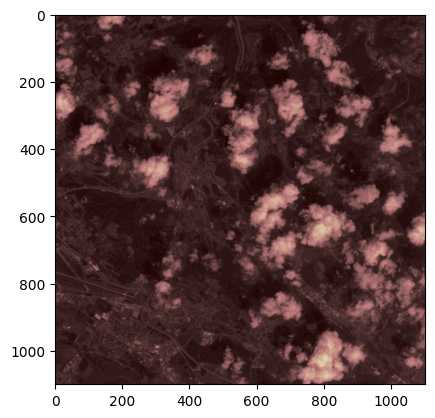

In [58]:
plt.imshow(array, cmap='pink')

In [82]:
# NEED TO PASS NODATA ARGUMENT, OTHERWISE THIS DOESN'T WORK.

s2_ds = RasterCollection.from_multi_band_raster(fpath_raster=s2_fpath,
                                                band_names_src=["B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B11", "B12"],
                                                nodata=-9999)
s2_ds

EOdal RasterCollection
----------------------
# Bands:    10
Band names:    B02, B03, B04, B05, B06, B07, B08, B8A, B11, B12
Band aliases:    

In [83]:
# get band statistics
s2_ds.band_summaries()

,min,mean,std,max,count,geometry,band_name
0,0.0,1184.489406,1743.451922,18128.0,1213300.0,"POLYGON ((483510.000 5246490.000, 483510.000 5...",B02
1,0.0,1351.206429,1627.425963,17104.0,1213300.0,"POLYGON ((483510.000 5246490.000, 483510.000 5...",B03
2,0.0,1207.663189,1659.893927,16432.0,1213300.0,"POLYGON ((483510.000 5246490.000, 483510.000 5...",B04
3,0.0,1692.144036,1649.148596,15411.0,1213300.0,"POLYGON ((483510.000 5246490.000, 483510.000 5...",B05
4,0.0,2988.336287,1592.478329,15825.0,1213300.0,"POLYGON ((483510.000 5246490.000, 483510.000 5...",B06
5,0.0,3444.154342,1665.377239,12385.0,1213300.0,"POLYGON ((483510.000 5246490.000, 483510.000 5...",B07
6,0.0,3656.661749,1791.248361,15616.0,1213300.0,"POLYGON ((483510.000 5246490.000, 483510.000 5...",B08
7,0.0,3624.300068,1690.110671,13828.0,1213300.0,"POLYGON ((483510.000 5246490.000, 483510.000 5...",B8A
8,0.0,2012.885961,1392.873542,15030.0,1213300.0,"POLYGON ((483510.000 5246490.000, 483510.000 5...",B11
9,0.0,1388.652071,1284.380238,13996.0,1213300.0,"POLYGON ((483510.000 5246490.000, 483510.000 5...",B12


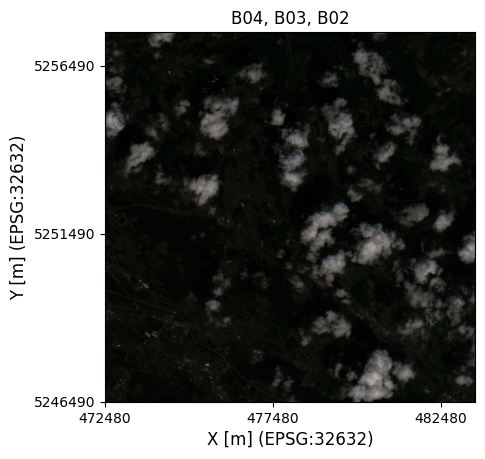

In [84]:
# plot bands in the visible part of the electro-magnetic spectrum
f = s2_ds.plot_multiple_bands(['B04','B03','B02'])

#### Load image data from STAC

In [85]:
# link to cloud-optimized geoTiffs at Swisstopp
dem_file = 'https://data.geo.admin.ch/ch.swisstopo.swissalti3d/swissalti3d_2019_2618-1092/swissalti3d_2019_2618-1092_2_2056_5728.tif'

In [86]:
# load resource into a Band instance and name it "Elevation"
dem = Band.from_rasterio(fpath_raster=dem_file, band_name_dst='Elevation')

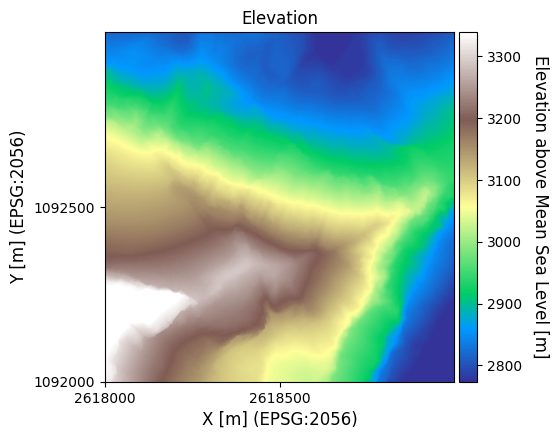

In [87]:
# fast visualization
fig = dem.plot(
    colormap='terrain',
    colorbar_label=f'Elevation above Mean Sea Level [m]'
)

In [88]:
raster.add_band(band_constructor=dem)


In [89]:
# check band names
raster.band_names

['random', 'Elevation']